#딥러닝 24강 RNN(4)


## 1. 실습을 위한 환경구성
- Google Colaboratory 사용
- Keras 사용

### (1) Google Colaboratory?
- 구글이 회사 내부에서 이용하고 있던 주피터 노트북을 연구와 교육 
  목적으로 커스텀 하여 개발한 툴, 즉 주피터 노트북의 구글 커스텀 
  버전이다(2017년10월 공개)
- Colaboratory는 텍스트, 코드, 코드 출력을 하나의 공동작업 분서로
  통합해 주는 머신러닝 교육과 연구를 위한 데이터 분석 도구. 
- Jupyter notebook 환경이므로 설치 없이도 사용 가능, 또한 컴퓨터에
  브라우저 외에 다른 프로그램을 다운로드, 설치, 실행하지 않고도
  jupyter notebook을 사용하고 다른 사용자와 매우 편리하게 공유할
  수 있음.



![대체 텍스트](https://i.imgur.com/yTNpXA9.png)

- 웹 브라우저 환경에서 도커로 구글 서버에 접속하여 작업을 할 수 있도
  록 개발. 대부분의 주요 브라우저와 호환되지만, 구글에서 개발하였기
  때문에 데스크톱 버전의 Chrome 및 Firefox를 대상으로 가장 꼼꼼한
  테스트가 이루어짐
- 구글 계정만 있으면 누구나 무료로 사용할 수 있음
- 현재 지원하는 언어는 Python 2.7, 3.6
- Colaboratory에서 실행된 코드는 본인의 구글 계정 전용의 가상
  머신에서 실행. 가상 머신은 한동안 유휴상태가 되면 시스템
  리소스 확보를 위해 재활용되며 시스템에 의해 최대 수명으로 실행


### (2) Google Colaboratory 실행방법


#### 1) https://colab.research.google.com/로 접속시 사용 가능
![대체 텍스트](https://i.imgur.com/YCDWb6R.png)

#### 2) Google Drive안에서 실행
 ![대체 텍스트](https://i.imgur.com/GCTAUo8.png)
 - 연결할 앱 더보기를 클릭, COLABORATORY 검색하여 추가

 ![대체 텍스트](https://i.imgur.com/Ju5Dvad.png)

### (3) Google Colaboratory UI  
- https://colab.research.google.com/ 로 접속하면 아래와 같은 화면이
  보임. 간단한 튜토리얼, 매뉴얼 등이 있음
- 목차 : 해당 노트북의 목차
- 코드 스니펫 : 재사용 가능한 소스 코드로 다양한 예제 코드가 있음
![대체 텍스트](https://i.imgur.com/NpG46Q7.png)

### (4) Google Colaboratory GPU 설정
- 런타임 유형 변경에서 GPU 사용 모드로 변경 가능
- GPU를 사용하기 위해 필요한 모듈 설치 불필요. 도커형태로 환경 구성  
  이 이미 되어있음.
  ![대체 텍스트](https://i.imgur.com/YRdCwHP.png)  

### (5) Google Colaboratory Python note 실행
- 새 note 실행 후, 코드를 작성해 보자!
![대체 텍스트](https://i.imgur.com/YfHZmw2.png)

### 텍스트 추가 실습

In [16]:
# 간단하게 테스트 실행. 설치된 텐서플로 버전을 출력.
import tensorflow as tf

print('hello, colaboratory')
print('tensorflow version:', tf.__version__)

hello, colaboratory
tensorflow version: 1.12.0


## Keras: The Python Deep Learning library

![대체 텍스트](https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png)
https://keras.io

Keras is a high-level neural networks API,

__written in Python__ and capable of running on top of __TensorFlow__, CNTK, or Theano. 

It was developed with a focus on __enabling fast experimentation__. 

Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:

Allows for __easy and fast prototyping__ (through user friendliness, modularity, and extensibility).

__Supports both convolutional networks and recurrent networks__, as well as combinations of the two.

Runs seamlessly on CPU and GPU.

Read the documentation at Keras.io.

Keras is compatible with: Python 2.7-3.6.

## 2. 간단한 RNN 실습

###(1) Keras에서 신경망 모델
- Sequential 클래스 객체인 모델을 선택
 - 일렬로 신경망을 쌓아가는 형태의 모델
 - Keras의 모델은 신경망 계층(layer)들을 쌓는 방법을 지정한다.
 - 기본적인 형태는 대부분 Sequential 모델을 사용하고, 복잡한 형태의 경우 Model 클래스를 사용할 수 있다.
- add 메서드로 Sequential 모델 안에 다양한 레이어 추가
- compile 메서드로 목적함수 및 최적화 방법 지정
 - 학습 과정에 관련된 정보들을 설정
 - 예를 들어 비용 함수나 최적화 방법 등
- fit 메서드로 가중치 계산
 - 실제 트레이닝을 실행


### (2) 전체학습코드
RNN을 사용하여 sine 함수를 학습하고 예측하는 실습

전체 코드를 통해 구성을 본 다음 부분별로 상세하게 분석해보자.

In [0]:
# 1. 필요한 라이브러리 import
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, CuDNNLSTM, TimeDistributed
from keras.utils import np_utils

# 2. 데이터 생성 및 전처리
data = "easyrnn"

char_set = list(set(data))  
char_dic = {w: i for i, w in enumerate(char_set)}

x_str = data[:-1]
y_str = data[1:]

input_dim = len(char_set)
timesteps = len(y_str)
num_classes = len(char_set)

print('입력 : ',x_str, '출력 : ',y_str)

x = [char_dic[c] for c in x_str]  # char to index
y = [char_dic[c] for c in y_str]  # char to index

# One-hot 인코딩
x = np_utils.to_categorical(x, num_classes=num_classes)
print('입력onehot\n',x)
# reshape X to be [samples, time steps, features(input_dim)] 3차원 tensor 형태
x = np.reshape(x, (-1, len(x), input_dim))
print('입력onehot_3차원\n',x)
print('입력 shape : ', x.shape)

# One-hot 인코딩
y = np_utils.to_categorical(y, num_classes=num_classes)
# time steps
y = np.reshape(y, (-1, len(y), input_dim))
print('출력 shape : ', y.shape)

# 3. 신경망 정의
model = Sequential()
model.add(CuDNNLSTM(num_classes, input_shape=(timesteps, input_dim), return_sequences=True))
model.add(TimeDistributed(Dense(num_classes)))
model.add((Dense(num_classes)))
model.add(Activation('softmax'))
model.summary()

# 4. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy',
              optimizer='Adam', metrics=['accuracy'])

# 5. 모델 학습
model.fit(x, y, epochs=500) # , steps_per_epoch=100

# 6. 모델 TEST
predictions = model.predict(x, verbose=0)
for i, prediction in enumerate(predictions):
    print('예측값\n', prediction)
    
    x_index = np.argmax(x[i], axis=1)
    x_str = [char_set[j] for j in x_index]
    print('입력')
    print(x_index, ''.join(x_str))

    index = np.argmax(prediction, axis=1)
    result = [char_set[j] for j in index]
    print('예측')
    print(index, ''.join(result))


#### 1) 필요한 library import
- np : data처리를 위한 numpy 모듈을 불러온다.
- Sequential : 순차형 모델 생성에 필요한 모듈
- Dense : 입출력 연결
- Activation : 활성함수 모듈
- CuDNNLSTM : GPU사용 LSTM 모델
- np_utils : one hot 인코딩 모듈

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, CuDNNLSTM
from keras.utils import np_utils

#### 2) 데이터 생성 및 전처리

In [0]:
# 학습 데이터 (샘플이 하나 뿐이므로 제대로 학습하지 않고 overfit될 것이지만, 여기에서는 케라스를 통한 RNN 실행 코드만 확인하자)

data = "iloveyou"

In [19]:
# list와 set활용 data의 unique값 추출
char_set = list(set(data))  # set 자료형은 중복을 허용하지않고, 순서가 없다.
print(char_set)

['e', 'v', 'l', 'y', 'u', 'i', 'o']


In [20]:
# enumerate 활용 각 str의 index 추출
char_dic = {w: i for i, w in enumerate(char_set)}
print(char_dic)

{'e': 0, 'v': 1, 'l': 2, 'y': 3, 'u': 4, 'i': 5, 'o': 6}


In [21]:
# 입력과 출력 data 설정
x_str = data[:-1]
y_str = data[1:]
print(x_str)
print(y_str)

iloveyo
loveyou


In [22]:
input_dim = len(x_str) # x 벡터의 크기
print('input_dim : ', input_dim)
timesteps = len(y_str) # 순서열의 길이
print('timesteps : ', timesteps)
num_classes = len(char_set) # 출력 클래스
print('num_classes : ', num_classes)


input_dim :  7
timesteps :  7
num_classes :  7


In [23]:
x = [char_dic[c] for c in x_str]  # char to index
print(x)
y = [char_dic[c] for c in y_str]  # char to index
print(y)

[5, 2, 6, 1, 0, 3, 6]
[2, 6, 1, 0, 3, 6, 4]


- Keras에서 RNN을 사용하려면 입력데이터(자료의수, 순서열의길이, x벡터의 크기)는 ndim=3인 3차원 tensor 형태이어야 한다

In [24]:
# One-hot 인코딩
x = np_utils.to_categorical(x, num_classes=num_classes)
print('입력onehot\n',x)
# reshape X to be [samples, time steps, features(input_dim)] 3차원 tensor 형태
x = np.reshape(x, (-1, len(x), input_dim))
print('입력onehot_3차원\n',x)
print('입력 shape : ', x.shape)

입력onehot
 [[0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
입력onehot_3차원
 [[[0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]
입력 shape :  (1, 7, 7)


In [25]:
# One-hot 인코딩
y = np_utils.to_categorical(y, num_classes=num_classes)
print('출력onehot\n', y)
# time steps
y = np.reshape(y, (-1, len(y), input_dim))
print('출력onehot_3차원\n',y)
print('출력 shape : ', y.shape)

출력onehot
 [[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]]
출력onehot_3차원
 [[[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1. 0. 0.]]]
출력 shape :  (1, 7, 7)


#### 3) 신경망 정의
- 심층 신경망을 만들기위해 Sequential 객체인 model을 정의하고 층층이 쌓는다.
- return_sequences=True는 모든 입력에 대해 출력 순서열 중 마지막 값만 출력하는 것이아니라 전체 순서열을 3차원 텐서 형태로 출력하여 sequence-to-sequence 문제로 풀 수 있다. 다만 입력 순서열과 출력 출력 순서열의 크기는 같아야 한다.
- 출력마다 Dense를 반복해서 덧붙여야 하므로 TimeDistributed를 사용하여, 3차원 teonsor 입력 받을 수 있게 확장한다

In [26]:
model = Sequential()
model.add(CuDNNLSTM(num_classes, input_shape=(timesteps, input_dim), return_sequences=True))
model.add((Dense(num_classes)))
model.add(Activation('softmax'))
model.summary() # 만들어진 구조 요약

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_2 (CuDNNLSTM)     (None, 7, 7)              448       
_________________________________________________________________
dense_2 (Dense)              (None, 7, 7)              56        
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7)              0         
Total params: 504
Trainable params: 504
Non-trainable params: 0
_________________________________________________________________


In [27]:
# model에 포함된 각 layer별 shape 확인
for l in model.layers :
  print('input shape:', l.input_shape)
  print('output shape:', l.output_shape)

input shape: (None, 7, 7)
output shape: (None, 7, 7)
input shape: (None, 7, 7)
output shape: (None, 7, 7)
input shape: (None, 7, 7)
output shape: (None, 7, 7)


#### 4) 모델 학습과정 설정
- 모델의 Loss function으로 멀티 레이블 예측에 적합한 
  범주형 크로스 엔트로피 함수를 사용한다.
- 최적화방법으로 Adam Optimizer를 사용, Learning rate는 0.001로 default다.
- 모델 평가 항목(Metric)으로 Accuracy(Y값을 정확히 예측한 비율)를 사용한다.

In [0]:
# model에 사용되는 학습 관련 파라미터 및 정보 설정

model.compile(loss='categorical_crossentropy',
              optimizer='Adam', metrics=['accuracy'])


#### 5) 모델학습
- 모델을 학습시키기 위해서 model.fit 함수를 사용한다.
- 모델에 학습에 사용할 데이터로 학습 데이터 셋(Train)을 지정한다.
- Epochs 학습횟수 지정
- verbose의 세가지 옵션(0: 과정 생략, 1: 과정 보기, 2:횟수와 loss만 확인), default = 1

In [30]:
# 모델 트레이닝
model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 349ms/step - loss: 1.9841 - acc: 0.1429
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 1.9825 - acc: 0.1429
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 1.9806 - acc: 0.1429
Epoch 4/200
1/1 [==============================] - 0s 9ms/step - loss: 1.9787 - acc: 0.1429
Epoch 5/200
1/1 [==============================] - 0s 9ms/step - loss: 1.9767 - acc: 0.1429
Epoch 6/200
1/1 [==============================] - 0s 9ms/step - loss: 1.9746 - acc: 0.1429
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 1.9726 - acc: 0.1429
Epoch 8/200
1/1 [==============================] - 0s 9ms/step - loss: 1.9705 - acc: 0.1429
Epoch 9/200
1/1 [==============================] - 0s 9ms/step - loss: 1.9684 - acc: 0.1429
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 1.9663 - acc: 0.2857
Epoch 11/200
1/1 [==============================] - 0s 10ms/step - loss: 1

#### 6) 모델 TEST

In [31]:
predictions = model.predict(x, verbose=0)
for i, prediction in enumerate(predictions):
    print('예측값\n ', prediction)
    
    x_index = np.argmax(x[i], axis=1)
    x_str = [char_set[j] for j in x_index]
    print('입력')
    print(x_index, ''.join(x_str))

    index = np.argmax(prediction, axis=1)
    result = [char_set[j] for j in index]
    print('예측')
    print(index, ''.join(result))

예측값
  [[0.1217448  0.17263614 0.24521406 0.07583506 0.09323186 0.08639602
  0.20494208]
 [0.1384086  0.20301028 0.1486073  0.07572684 0.08924703 0.05300216
  0.29199782]
 [0.15156421 0.20145707 0.06757811 0.1136449  0.11829535 0.04544947
  0.30201092]
 [0.18832026 0.1489601  0.03386522 0.1616846  0.12250967 0.02916204
  0.31549808]
 [0.18204334 0.11149957 0.0189054  0.24916132 0.15625322 0.03067248
  0.2514647 ]
 [0.19617112 0.08304144 0.0274256  0.2129679  0.17946151 0.02172938
  0.27920306]
 [0.13116592 0.07546454 0.02713456 0.23832674 0.32197857 0.03933125
  0.1665984 ]]
입력
[5 2 6 1 0 3 6] iloveyo
예측
[2 6 6 6 6 6 4] looooou


## 3. 시계열데이터 single time point 예측 실습

### (1) 전체 학습코드

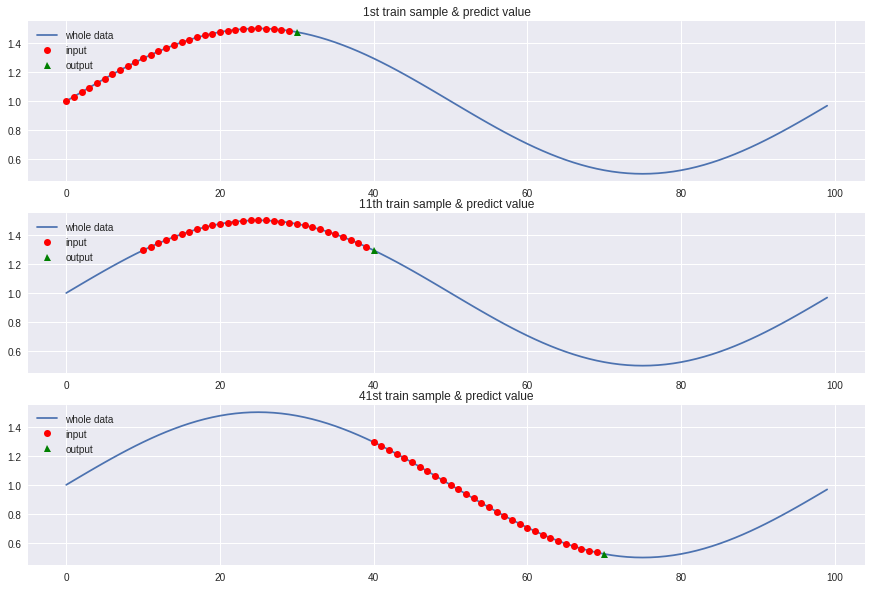

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_3 (CuDNNLSTM)     (None, 32)                4480      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 4,513
Trainable params: 4,513
Non-trainable params: 0
_________________________________________________________________


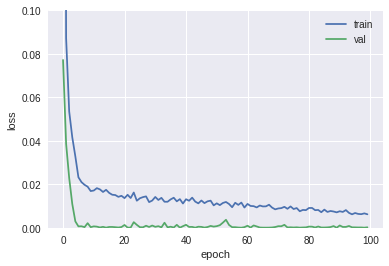

Train Loss:  0.0002527112313867386
Validataion Loss:  0.00022925082362403542
Test Loss:  0.00022925082362403542


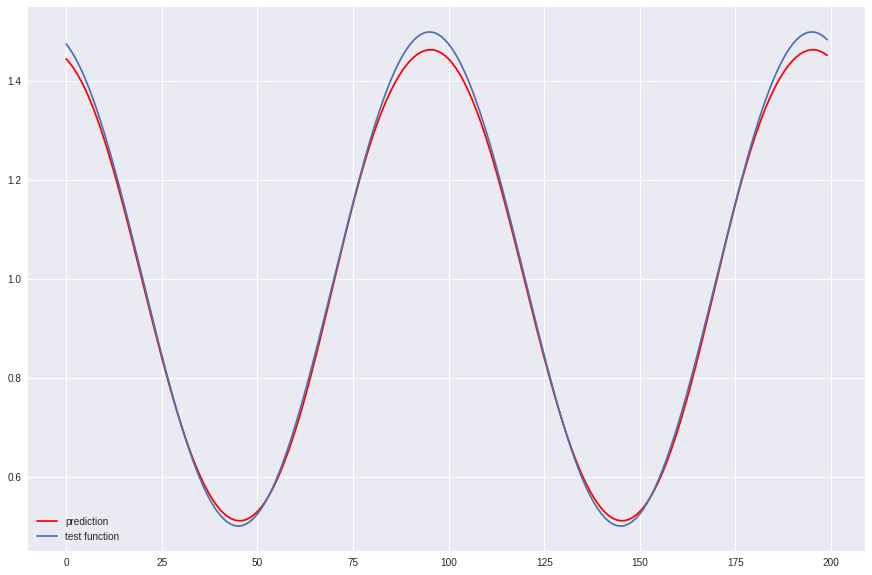

In [0]:
# 1. 필요한 라이브러리 import
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, CuDNNLSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

# 2. 하이퍼 파라메터 설정
training_cnt = 100
batch_size = 32
num_classes = 1
time_shift = 30 # 30개의 연속된 값을 입력으로 하여 31번째 값을 추정


# 3. 데이터셋 생성
# sin 데이터 생성
sin_data = np.sin(np.arange(1500)*(2*np.pi*0.01))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0.5, 1.5))
sin_data = scaler.fit_transform(sin_data)

# 데이터 분리(training, validation, test)
train = sin_data[0:900]
val = sin_data[900:1200]
test = sin_data[1200:]

# 데이터셋 생성함수 
def create_dataset(sin_data, time_shift=1):
    dataX, dataY = [], []
    for i in range(len(sin_data)-time_shift):
        dataX.append(sin_data[i:(i+time_shift), 0])
        dataY.append(sin_data[i + time_shift, 0])
    return np.array(dataX), np.array(dataY)

# create 데이터셋
x_train, y_train = create_dataset(train, time_shift)
x_val, y_val = create_dataset(val, time_shift)
x_test, y_test = create_dataset(test, time_shift)

# RNN with Keras 학습을 위한 데이터셋 reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# traing data 확인
plt.figure(figsize=(15, 10),frameon=False)    

# 첫번째 input sample 30개(0~29), output sample 1개(31번째 output)
i= 0  
plt.subplot(311)
plt.plot(np.arange(0,100),train[0:100])
plt.plot(np.arange(i, time_shift + i ), x_train[i], 'ro')
plt.plot(time_shift + i,y_train[i], 'g^')
plt.legend(['whole data','input','output'], loc='upper left')
plt.title("1st train sample & predict value" )

# 11번째 input sampe 30개(10~39), output sample 1개(41번째 output)
i= 10
plt.subplot(312)
plt.plot(np.arange(0,100),train[0:100])
plt.plot(np.arange(i, time_shift + i), x_train[i], 'ro')
plt.plot(time_shift + i,y_train[i], 'g^')
plt.legend(['whole data','input','output'], loc='upper left')
plt.title("11th train sample & predict value" )

# 41번째 input sampe 30개(40~69), output sample 1개(71번째 output)
i= 40
plt.subplot(313)
plt.plot(np.arange(0,100),train[0:100])
plt.plot(np.arange(i, time_shift + i), x_train[i], 'ro')
plt.plot(time_shift + i,y_train[i], 'g^')
plt.legend(['whole data','input','output'], loc='upper left')
plt.title("41st train sample & predict value" )

plt.show()

# 4. 신경망 정의
model = Sequential()
model.add(CuDNNLSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.summary()

# 5. 모델 학습과정 설정
model.compile(loss='mean_squared_error', optimizer='adam')

# 6. 모델 학습
hist = model.fit(x_train, y_train, epochs=training_cnt, batch_size=batch_size, 
                 validation_data=(x_val, y_val),verbose=0)

# 학습과정 Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# 8. 모델 평가
trainLoss = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Loss: ', trainLoss)
valLoss = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Loss: ', valLoss)
testLoss = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Loss: ', testLoss)

# 9. 예측모델 비교
time_ahead = 200
predictions = np.zeros((time_ahead,1))
for i in range(time_ahead):
    prediction = model.predict(np.array([x_test[i]]))
    predictions[i] = prediction
    
plt.figure(figsize=(15,10))
plt.plot(np.arange(time_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(time_ahead),y_test[:time_ahead],label="test function")
plt.legend()
plt.show()

#### 1) 필요한 라이브러리 import
- np : data처리를 위한 numpy 모듈을 불러온다.
- Sequential : 순차형 모델 생성에 필요한 모듈
- Dense : 입출력 연결
- CuDNNLSTM : GPU사용 LSTM 모델
- Dropout : Dropout 모듈
- MinMaxScaler : 데이터 최소 최대 지정값으로 전처리 
- pyplot : 그래프 구현
- % matplotlib inline : 현재 jupyter notebook 실행 브라우저에서 그림 보여줌

In [0]:
# 1. 필요한 라이브러리 import
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, CuDNNLSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### 2) 하이퍼 파라메터 설정

In [0]:
# 2. 하이퍼 파라메터 설정
training_cnt = 100  # 학습횟수
batch_size = 32     # 처리할 데이터의 수
num_classes = 1     # 출력 class
time_shift = 30     # data 30개 단위로 shift

#### 3) 데이터셋 생성

In [0]:
# sin 데이터 생성
sin_data = np.sin(np.arange(1500)*(2*np.pi*0.01))[:,None]

In [0]:
# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0.5, 1.5)) # 0.5~1.5 사이로 scale
sin_data = scaler.fit_transform(sin_data)

In [0]:
# 데이터 분리
train = sin_data[0:900]   # training data
val = sin_data[900:1200]  # validation data
test = sin_data[1200:]    # test data 

- sin data 받아 30개씩 shift된 데이터 형태의 input data와 input data 바로 다음의 출력데이터를 만드는 함수

In [0]:
# 데이터셋 생성함수 
def create_dataset(sin_data, time_shift=1):
    dataX, dataY = [], []
    for i in range(len(sin_data)-time_shift):
        dataX.append(sin_data[i:(i+time_shift), 0])
        dataY.append(sin_data[i + time_shift, 0])
    return np.array(dataX), np.array(dataY)

In [0]:
# create 데이터셋
x_train, y_train = create_dataset(train, time_shift)
x_val, y_val = create_dataset(val, time_shift)
x_test, y_test = create_dataset(test, time_shift)

- Keras RNN 모델은 입력은 ndim=3인 3차원 tensor 형태의 데이터(자료의수, 순서열의길이, x벡터의 크기)이어야 한다

In [41]:
print(x_train.shape)

(870, 30)


In [0]:
# RNN with Keras 학습을 위한 데이터셋 reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [43]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(870, 30, 1)
(270, 30, 1)
(270, 30, 1)


- matplotlib을 활용하여 inputdata와 output 데이터 나타내기

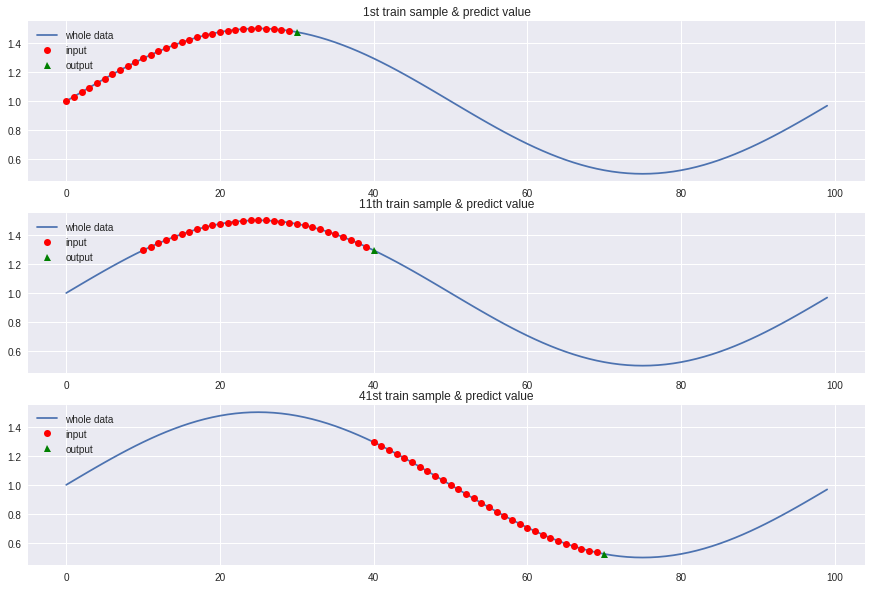

In [44]:
# traing data 확인
plt.figure(figsize=(15, 10),frameon=False)    

# 첫번째 input sampe 30개(0~29), output sample 1개(31번째 output)
i= 0  
plt.subplot(311)
plt.plot(np.arange(0,100),train[0:100])
plt.plot(np.arange(i, time_shift + i ), x_train[i], 'ro')
plt.plot(time_shift + i,y_train[i], 'g^')
plt.legend(['whole data','input','output'], loc='upper left')
plt.title("1st train sample & predict value" )

# 11번째 input sampe 30개(10~39), output sample 1개(41번째 output)
i= 10
plt.subplot(312)
plt.plot(np.arange(0,100),train[0:100])
plt.plot(np.arange(i, time_shift + i), x_train[i], 'ro')
plt.plot(time_shift + i,y_train[i], 'g^')
plt.legend(['whole data','input','output'], loc='upper left')
plt.title("11th train sample & predict value" )

# 41번째 input sampe 30개(40~69), output sample 1개(71번째 output)
i= 40
plt.subplot(313)
plt.plot(np.arange(0,100),train[0:100])
plt.plot(np.arange(i, time_shift + i), x_train[i], 'ro')
plt.plot(time_shift + i,y_train[i], 'g^')
plt.legend(['whole data','input','output'], loc='upper left')
plt.title("41st train sample & predict value" )

plt.show()

#### 4) 신경망 정의
- 심층 신경망을 만들기위해 Sequential 객체인 model을 정의하고 층층이 쌓는다.

In [45]:
# 4. 신경망 정의
model = Sequential()
model.add(CuDNNLSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))  # 과적합 방지
model.add(Dense(num_classes))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_3 (CuDNNLSTM)     (None, 32)                4480      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,513
Trainable params: 4,513
Non-trainable params: 0
_________________________________________________________________


#### 5) 모델 학습과정 설정
- loss = mse 사용
- optimizer = adam optimazer 사용

In [0]:
# 5. 모델 학습과정 설정
model.compile(loss='mean_squared_error', optimizer='adam')

#### 6) 모델학습
- 미리 split 해둔 validataion data 사용

In [0]:
# 6. 모델 학습
hist = model.fit(x_train, y_train, epochs=training_cnt, batch_size=batch_size, 
                 validation_data=(x_val, y_val),verbose=0)


- matplotlib을 사용하여 학습하면서 줄어드는 loss 나타내기

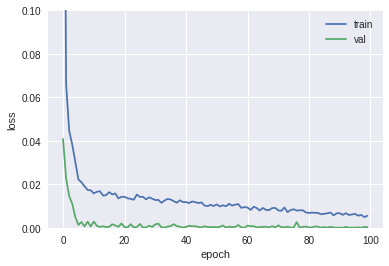

In [48]:
# 학습과정 Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#### 7) 모델평가
- evaluate 사용하여 각각의 데이터셋의 loss 평가

In [49]:
# 7. 모델 평가
trainLoss = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Loss: ', trainLoss)
valLoss = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Loss: ', valLoss)
testLoss = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Loss: ', testLoss)

Train Loss:  0.0002920332811331248
Validataion Loss:  0.00029442726734958815
Test Loss:  0.00029442726734958815


#### 8) 예측모델 비교
- 예측하여 만들어진 데이터와 실제데이터를 비교

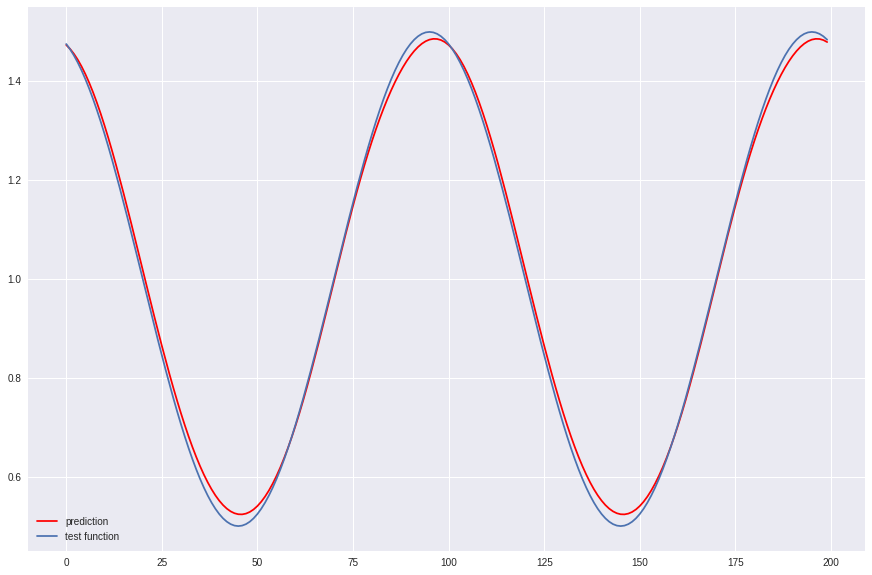

In [50]:
# 8. 예측모델 비교
time_ahead = 200
predictions = np.zeros((time_ahead,1))
for i in range(time_ahead):
    prediction = model.predict(np.array([x_test[i]]))
    predictions[i] = prediction
    
plt.figure(figsize=(15,10))
plt.plot(np.arange(time_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(time_ahead),y_test[:time_ahead],label="test function")
plt.legend()
plt.show()